# Homework 02 Statisical Machine Learning
### Plasencia Milton
### DSSC, A.Y 2019-2020

### Exercise 1

$1)$ Calculate the probability that Luca is positive to the test:

A = Luca has the virus

B = The test is positive 

Pr(Luca positive)= Pr(A and B) + Pr($A^c$ and B) = Pr(B | A)*Pr(A) + Pr(B | $A^c$)*Pr($A^c$)=

=$\frac{97}{100} \cdot 0.005 + \frac{3}{100} \cdot 0.995= 0.0347$

$2)$ Suppose Luca is positive to the test. What is the probability that he has contracted the disease?

\begin{equation}
Pr(A | B) = \frac{Pr(B|A) Pr(A)}{Pr(B)}= \frac{0.97 \cdot 0.005}{0.0347} = 0.14
\end{equation}

### Exercise 2

1.0

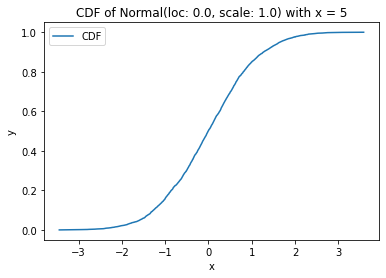

In [2]:
#Implement the empirical cumulative distribution function using pyro and plot the cdf of a normal.
import numpy as np 
import torch
import pyro
import matplotlib.pyplot as plt
import pyro.distributions as dist
pyro.set_rng_seed(1)
mean = 0
var = 1
normal = dist.Normal(mean,var)

def cdf(dist1,x):
    sample = np.sort([pyro.sample('d', dist1) for i in range(5000)])
    s_size = sample.size
    y = np.arange(1, s_size+1) / s_size
    x_plot = []
    for i in range(len(sample)):
        if sample[i] < x:
            x_plot.append(sample[i])
        else:
            break
    y_plot = []
    for i in range(len(x_plot)):
        y_plot.append(y[i])
    plt.plot(x_plot, y_plot, label='CDF');
    plt.xlabel('x', fontsize=10)
    plt.ylabel('y', fontsize=10)
    plt.title('CDF of ' +str(dist1)+ ' with x = ' +str(x) )
    plt.legend()
    return y_plot[-1]
cdf(normal, 5)


### Exercise 3

0.9476 is the result


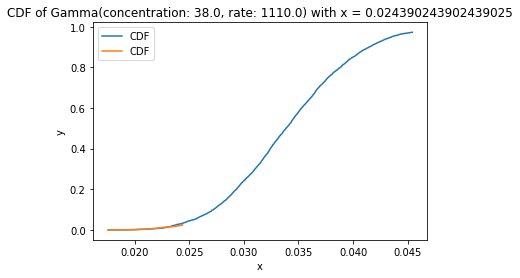

In [3]:
# 1) Empirically verify that the parameters of the inverse-gamma distribution lead to a 
#    prior probability of approximately $95\%$ that $\sigma^2\in[22,41]$.
ga=dist.Gamma(38,1110)
p1=cdf(ga,1/22)
p2=cdf(ga, 1/41)
print(p1-p2, 'is the result') 

$2)$ Derive the posterior density with the data and  plot it together with the prior.

We know that:

\begin{equation}
X \textit{ ~ } N(180, \sigma ^2) \; \textit{ and } \; \sigma^2 \textit{ ~ } IG(38, 1110)
\end{equation}

and:

\begin{equation}
Pr(\sigma^2 | X) \; \alpha \; Pr(X | \sigma^2) \cdot Pr(\sigma^2).
\end{equation}

So, removing every term that does not depend on $\sigma ^2$:

\begin{equation}
\prod_{i=1}^n \frac{1}{\sqrt{\sigma ^2}} e^{-\frac{1}{2\sigma ^2} (x_i -\mu)^2} \cdot \frac{e^{\frac{-\beta}{\sigma^2}}}{(\sigma^2)^{\alpha -1}} = \left( \frac{1}{\sigma ^2} \right) ^{\frac{n}{2}} e^{-\frac{1}{2\sigma ^2} \sum_{i=1}^n(x_i -\mu)^2} \cdot \frac{e^{\frac{-\beta}{\sigma^2}}}{(\sigma^2)^{\alpha -1}} = \left( \frac{1}{(\sigma ^2)^{\alpha + \frac{n}{2} -1}} \right) e^{-\frac{1}{\sigma ^2} \left( \beta + \frac{1}{2} \sum_{i=1}^n( x_i - \mu)^2 \right)}
\end{equation}

which is an IG(38 + $\frac{n}{2}$, 1110 + $\frac{1}{2} \sum_{i=1}^n( x- \mu)^2$) = IG(46, 1380). 

In [1]:
# Run this code to get the plot of posterior and prior
#from PIL import Image               #install package Pillow
#myImage = Image.open("ML.png");
#myImage.show();

![alt text](ML.png "Plot posterior and prior")

$3)$ Compute the posterior density of the standard deviation $\sigma$.

Given the monotonic function $g(\cdot)$ such that $g(x)= \sqrt{x}$. We also define the variable $y=g(\sigma ^2)=\sigma$. Now we can compute:

\begin{equation}
g^{-1}(y)=y^2 \; \textit{ and so } \; \frac{dg^{-1}(y)}{dy}= 2y 
\end{equation}

By applying a change of variables in the density function we obtain:

\begin{equation}
f_Y(y) = |2y| \frac{\beta^\alpha}{\Gamma(\alpha)} (y^2)^{-\alpha -1} e^{-\frac{\beta}{y^2}} = \frac{2 \beta^\alpha}{\Gamma(\alpha)} y^{-(2\alpha +1)} e^{-\frac{\beta}{y^2}}
\end{equation}

which is the the posterior density of the $\sigma$

### Exercise 4

Prove that the Gamma distribution is the conjugate prior distribution for the Exponential likelihood.

\begin{equation}
f_X(x) = \lambda e^{-\lambda x} \; \; \textit{Exponential density function}
\end{equation}

\begin{equation}
f_Y(y) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha -1} e^{-\beta \lambda} \; \; \textit{Gamma density function}
\end{equation}

We have to prove that:

\begin{equation}
Pr(\lambda | x) \; \; \alpha \; \; Pr(x | \lambda) Pr(\lambda)
\end{equation}

So we can compute:

\begin{equation}
Pr(x | \lambda) \; \; \alpha \; \; \prod_{i=1}^n \lambda e^{-\lambda x} = \lambda ^n e^{-\lambda \sum_{i=0}^n x_i}
\end{equation}

and then:

\begin{equation}
Pr(\lambda | x) \; \; \alpha \; \; (\lambda ^n e^{-\lambda \sum_{i=0}^n x_i} )\lambda^{\alpha -1} e^{-\beta \lambda} = \lambda^{\alpha + n -1} e^{-\lambda (\beta + \sum_{i=0}^n x_i)}
\end{equation}

which is a $gamma(n+\alpha, \beta + \sum_{i=0}^n x_i)$.